import pandas as pd
import numpy as np


df = pd.read_csv("competition_dataset/dev.tsv", sep="\t")

(df[pd.isna(df["region_1"]) & pd.isna(df["region_2"])])

df.info()

df

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
print(df["designation"].value_counts())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df["designation"].value_counts()[:100])

#df[df["designation_tr"] == "reserva" | df["designation_tr"] == "riserva" | df["designation_tr"] == "rèserve"]["designation_tr"] = "reserve"
df["designation_tr"] = df["designation"].apply(lambda d: d.lower() if pd.isna(d) == False else d)
df["designation_tr"] = df["designation_tr"].replace(["reserva","riserva","rèserve"],["reserve","reserve","reserve"])


df

# rimuovo regioni doppie e creo regione unica
df.loc[df["region_1"] == df["region_2"], "region_2"] = ""
df["region_complete"] = df[["region_1","region_2"]].fillna(" ").agg(' '.join, axis=1)

singular_region_complete = set(df["region_complete"])
len(singular_region_complete)

import geocoder

g = geocoder.arcgis('Redlands, CA')
print(g.latlng)

import geocoder

singular_region_complete_with_latlong = []
for region in singular_region_complete:
    print(region)
    loc =  geocoder.arcgis(region,maxRows=1)
    print(loc)
    try:
        singular_region_complete_with_latlong.append((region, loc.latlng[0],loc.latlng[1]))   
    except:
        pass

with open('region_coordinates.csv', 'w') as fp:
    fp.write('\n'.join('%s,%f,%f' % x for x in singular_region_complete_with_latlong))

df_region_coordinates = pd.read_csv('region_coordinates.csv')

df = pd.merge(df, df_region_coordinates, how="left", on="region_complete")

df.to_csv("competition_dataset/mine_dev.csv",index=False)

df = pd.get_dummies(df, columns=["designation_tr","province","variety"])

df.columns

df = pd.read_csv("competition_dataset/mine_dev.csv")

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    df["designation_tr"].value_counts()[:200]
    
len(df["designation_tr"].value_counts())

import gmaps
import gmaps.datasets
from ipywidgets.embed import embed_minimal_html

locations = df[['lat', 'long']]
weights = df['quality']
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations, weights=weights)
fig.add_layer(heatmap_layer)
embed_minimal_html('export.html', views=[fig])

df["variety"].value_counts()[:50]

df["province"].value_counts()[:50]

df["region_complete"] = df["region_complete"].replace(r'^\s*$', np.NaN, regex=True)


df = pd.get_dummies(df, columns=["region_complete","variety"])

df.to_csv("competition_dataset/mine_dev_with_dummies.csv",index=False)

df = pd.read_csv("competition_dataset/mine_dev_with_dummies.csv")

len(df.columns)

from platform import python_version

print(python_version())


In [24]:
import pandas as pd
import numpy as np

In [25]:
#Caricamento di x
df = pd.read_csv("competition_dataset/dev.tsv", sep="\t")

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120744 entries, 0 to 120743
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120739 non-null  object 
 1   description  120744 non-null  object 
 2   designation  84226 non-null   object 
 3   province     120739 non-null  object 
 4   region_1     100736 non-null  object 
 5   region_2     48736 non-null   object 
 6   variety      120744 non-null  object 
 7   winery       120744 non-null  object 
 8   quality      120744 non-null  float64
dtypes: float64(1), object(8)
memory usage: 8.3+ MB


df_test = df.drop_duplicates()

df_test[df_test["province"] == "Idaho"]

df_test.info()

mask = (df_test['region_1'].isnull()) & (df_test['region_2'].isnull()) & df_test['province'].isnull()

df_test[mask].info()

# In 13889 record entrambe le region sono nulle
# In 3 record entrambe le region sono nulle e anche la province

mask = df_test['region_1'].isnull() & df_test['region_2'].isnull()

province_with_region_nans = df_test[mask]["province"].unique()

print(len(province_with_region_nans))

df_test[df_test["province"] == "Mendoza Province"]

mask_3 = (df_test['region_1'].isnull()) & (df_test['region_2'].isnull())
df_test[mask_3]

# In 13889 record entrambe le region sono nulle

mask_2 = (df_test['region_1'].isnull() & df_test['region_2'].isnull()) == False

df_test_at_least_one_region = df_test[mask_2]

province_with_at_least_one_region = df_test[mask_2]["province"].unique()

df_test_at_least_one_region[df_test_at_least_one_region["province"].isin(province_with_region_nans)]

country_with_at_least_one_region = df_test[mask_2]["country"].unique()

province_with_at_least_one_region

df_test = df.drop_duplicates()

mask_2 = (df_test['region_1'].isnull() & df_test['region_2'].isnull()) == False
province_with_at_least_one_region = df_test[mask_2]["province"].unique()

mask4 = (df_test['region_1'].isnull()) & (df_test['region_2'].isnull()) & (df_test['province'].isin(province_with_at_least_one_region))
df_test_no_region_in_at_least_one_prov = df_test[mask4].copy() # province che non hanno region in almeno un record e hanno region in almeno un record

province_interested = df_test_no_region_in_at_least_one_prov["province"].unique()

# In 88 record le due regioni sono nulle e la provincia ha almeno un record con una regione

mask = df_test["province"].isin(province_interested)
df_test_interested = df_test[mask].copy()

df_test_interested.loc[df_test_interested["region_1"] == df_test_interested["region_2"], "region_2"] = "" # se region1 e 2 sono uguali rendo region 2 una stringa vuota
df_test_interested["region_complete"] = df_test_interested[["region_1","region_2"]].fillna(" ").agg(' '.join, axis=1)
df_test_interested["region_complete"] = df_test_interested["region_complete"].replace(r'^\s*$', np.NaN, regex=True)

provinces = (df_test_interested[["province","region_complete"]].groupby(['province']).agg(lambda x:x.value_counts().index[0] if len(x.value_counts().index) > 0 else "Null").to_dict())

df_test_interested[((df_test_interested["region_1"].isnull() == True) & (df_test_interested["region_2"].isnull() == True))].info()

mask6 = (df_test['region_1'].isnull()) & (df_test['region_2'].isnull()) & (df_test['country'].isin(country_with_at_least_one_region))
df_test_no_region_in_at_least_one_coun = df_test[mask6]

df_test_no_region_in_at_least_one_prov.info()

# In 88 record le due regioni sono nulle e la nazione ha almeno un record con una regione

mask5 = (df_test['region_1'].isnull()) & (df_test['region_2'].isnull()) & (df_test['province'].isnull())

df_test_no_region_no_prov = df_test[mask5]

df_test_no_region_no_prov.info()

In [26]:
import pandas as pd
import numpy as np
import math

In [27]:
#Caricamento di x
df = pd.read_csv("competition_dataset/dev.tsv", sep="\t")

[array([7.0, 8.0, 8.0, 8.0, 8.0, 7.0, 8.0, 8.0, 0.0, 8.0, 8.0, 7.0, 8.0,
       8.0, 8.0, 12.0, 12.0, 7.0, 8.0, 0.0, 7.0, 8.0, 8.0, 7.0, 12.0, 0.0,
       8.0, 7.0, 7.0, 7.0, 12.0, 7.0, 7.0, 7.0, 7.0, 8.0, 7.0, 8.0, 7.0,
       7.0, 8.0, 0.0, 7.0, 7.0, 0.0, 0.0, 0.0, 8.0, 8.0, 8.0, 8.0, 7.0,
       8.0, 8.0, 0.0, 7.0, 0.0, 8.0, 8.0, 8.0, 7.0, 7.0, 8.0, 8.0, 7.0,
       0.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 7.0, 0.0, 7.0, 7.0, 0.0, 8.0,
       8.0, 8.0, 0.0, 0.0, 7.0, 8.0, 7.0, 0.0, 7.0, 7.0, 96.0, 81.0, 83.0,
       83.0, 81.0, 81.0, 86.0, 83.0, 82.0, 84.0, 89.0, 82.0, 86.0, 85.0,
       82.0, 85.0, 84.0, 82.0, 87.0, 85.0, 85.0, 88.0, 83.0, 85.0, 86.0,
       85.0, 82.0, 86.0, 82.0, 83.0, 83.0, 84.0, 86.0, 82.0, 85.0, 85.0,
       86.0, 85.0, 83.0, 92.0, 81.0, 81.0, 81.0, 85.0, 92.0, 86.0, 87.0,
       82.0, 88.0, 86.0, 85.0, 83.0, 85.0, 82.0, 82.0, 82.0, 88.0, 82.0,
       83.0, 83.0, 81.0, 85.0, 84.0, 84.0, 82.0, 84.0, 87.0, 87.0, 85.0,
       85.0, 81.0, 96.0, 86.0, 82.0, 81.0, 82.0, 9

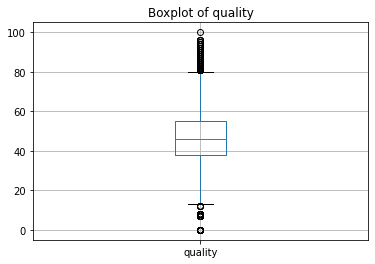

In [70]:
import matplotlib.pyplot as plt

myFig = plt.figure();
ax, bp = df.boxplot(column=['quality'], return_type="both")
ax.set_title("Boxplot of quality")
myFig.savefig("myName.svg", format="svg")

outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
print(outliers, boxes, medians, whiskers)

In [71]:
quantiles = df.quantile([0.01, 0.25, 0.5, 0.75, 0.99])
quantiles

,quality
0.01,21.0
0.25,38.0
0.50,46.0
0.75,55.0
0.99,74.0


In [72]:
len(df)-len(df.drop_duplicates())

35716

In [73]:
(df[df["quality"] ==0])

,country,description,designation,province,region_1,region_2,variety,winery,quality
14741,Argentina,Clean as anyone should reasonably expect given...,NaN,Mendoza Province,Mendoza,NaN,Malbec,Toca Diamonte,0.0
32205,US,"There's a lot going on in this Merlot, which i...",NaN,California,California,California Other,Merlot,Bandit,0.0
36956,Spain,This opens with standard cherry and berry arom...,NaN,Levante,Yecla,NaN,Cabernet Sauvignon,Terrenal,0.0
57733,US,"Packaged in a cute yellow recyclable Tetrapak,...",NaN,California,California,California Other,Chardonnay,Bandit,0.0
60836,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,Levante,Yecla,NaN,Tempranillo,Terrenal,0.0
62739,Argentina,"Crimson in color but also translucent, with a ...",Red,Mendoza Province,Mendoza,NaN,Malbec-Syrah,Broke Ass,0.0
63098,US,"There's a lot going on in this Merlot, which i...",NaN,California,California,California Other,Merlot,Bandit,0.0
74440,US,"There's a lot going on in this Merlot, which i...",NaN,California,California,California Other,Merlot,Bandit,0.0
75733,US,"Easy, simple peach and strawberry flavors are ...",White Zinfandel,California,California,California Other,Zinfandel,Round Hill,0.0
90864,Spain,This opens with standard cherry and berry arom...,NaN,Levante,Yecla,NaN,Cabernet Sauvignon,Terrenal,0.0


In [74]:
df_test = df.drop_duplicates()

df_test[df_test["region_1"] == df_test["region_2"]]

,country,description,designation,province,region_1,region_2,variety,winery,quality
2,US,"This lovely wine captures the floral, perfumed...",NaN,Oregon,Willamette Valley,Willamette Valley,Gewürztraminer,Château Bianca,35.0
10,US,"Soft, fruity and simple, with upfront flavors ...",Coastal - Private Selection,California,Central Coast,Central Coast,Johannisberg Riesling,Robert Mondavi,24.0
62,US,"This tastes dry, though the 12.5 g/L residual ...",NaN,Oregon,Willamette Valley,Willamette Valley,Riesling,Penner-Ash,45.0
141,US,"Adelsheim makes 9,000 cases of this full-flavo...",NaN,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Adelsheim,40.0
144,US,"Fresh, herbaceous green notes waft from nose t...",NaN,New York,Finger Lakes,Finger Lakes,Cabernet Sauvignon,Billsboro,48.0
...,...,...,...,...,...,...,...,...,...
120182,US,"Barbera fans will find all the dry tannins, ac...",NaN,California,Sierra Foothills,Sierra Foothills,Barbera,Stevenot,36.0
120249,US,Packaged in an unusual plastic-style recyclabl...,NaN,California,North Coast,North Coast,Sauvignon Blanc,Indulge,42.0
120266,US,"This crisp, refreshing and all-stainless Chard...",INOX,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Chehalem,40.0
120303,US,This light but balanced wine offers tart flavo...,NaN,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Abbey Creek,44.0


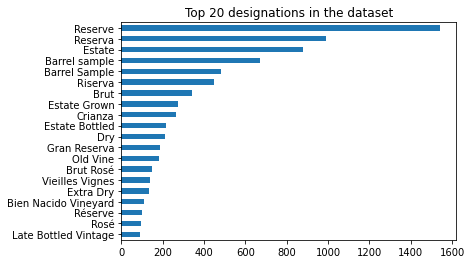

In [75]:
myFig = plt.figure();
ax = df_test["designation"].value_counts()[:20][::-1].plot(kind='barh')
ax.set_title("Top 20 designations in the dataset")
myFig.savefig("Top_20_designations.svg", format="svg",bbox_inches='tight')


In [76]:
outliers = [flier.get_ydata() for flier in bp["fliers"]]
sorted(outliers)

[array([7.0, 8.0, 8.0, 8.0, 8.0, 7.0, 8.0, 8.0, 0.0, 8.0, 8.0, 7.0, 8.0,
        8.0, 8.0, 12.0, 12.0, 7.0, 8.0, 0.0, 7.0, 8.0, 8.0, 7.0, 12.0, 0.0,
        8.0, 7.0, 7.0, 7.0, 12.0, 7.0, 7.0, 7.0, 7.0, 8.0, 7.0, 8.0, 7.0,
        7.0, 8.0, 0.0, 7.0, 7.0, 0.0, 0.0, 0.0, 8.0, 8.0, 8.0, 8.0, 7.0,
        8.0, 8.0, 0.0, 7.0, 0.0, 8.0, 8.0, 8.0, 7.0, 7.0, 8.0, 8.0, 7.0,
        0.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 7.0, 0.0, 7.0, 7.0, 0.0, 8.0,
        8.0, 8.0, 0.0, 0.0, 7.0, 8.0, 7.0, 0.0, 7.0, 7.0, 96.0, 81.0, 83.0,
        83.0, 81.0, 81.0, 86.0, 83.0, 82.0, 84.0, 89.0, 82.0, 86.0, 85.0,
        82.0, 85.0, 84.0, 82.0, 87.0, 85.0, 85.0, 88.0, 83.0, 85.0, 86.0,
        85.0, 82.0, 86.0, 82.0, 83.0, 83.0, 84.0, 86.0, 82.0, 85.0, 85.0,
        86.0, 85.0, 83.0, 92.0, 81.0, 81.0, 81.0, 85.0, 92.0, 86.0, 87.0,
        82.0, 88.0, 86.0, 85.0, 83.0, 85.0, 82.0, 82.0, 82.0, 88.0, 82.0,
        83.0, 83.0, 81.0, 85.0, 84.0, 84.0, 82.0, 84.0, 87.0, 87.0, 85.0,
        85.0, 81.0, 96.0, 86.0, 82.0, 

In [77]:
df[df["country"].isna()]

,country,description,designation,province,region_1,region_2,variety,winery,quality
28353,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,NaN,NaN,NaN,Pinot Noir,Chilcas,37.0
48154,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,NaN,NaN,NaN,Pinot Noir,Chilcas,37.0
76257,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,NaN,NaN,NaN,Pinot Noir,Chilcas,37.0
88206,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,NaN,NaN,NaN,Assyrtiko,Tsililis,38.0
92096,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,NaN,NaN,NaN,Red Blend,Büyülübağ,49.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120744 entries, 0 to 120743
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120739 non-null  object 
 1   description  120744 non-null  object 
 2   designation  84226 non-null   object 
 3   province     120739 non-null  object 
 4   region_1     100736 non-null  object 
 5   region_2     48736 non-null   object 
 6   variety      120744 non-null  object 
 7   winery       120744 non-null  object 
 8   quality      120744 non-null  float64
dtypes: float64(1), object(8)
memory usage: 8.3+ MB


In [28]:
# Preprocessing su x
print(len(df))
df = df.drop_duplicates() # Rimuovo duplicati
print(len(df))


df = df.drop(df[df["quality"] == 0].index) #Rimuovo righe con qualità uguale a zero ( sono solo 15 in totale )
df.reset_index(drop=True, inplace=True)

df["designation_tr"] = df["designation"].apply(lambda d: d.lower() if pd.isna(d) == False else d)
df["designation_tr"] = df["designation_tr"].replace(["reserva","riserva","réserve"],["reserve","reserve","reserve"])


df.loc[df["region_1"] == df["region_2"], "region_2"] = "" # se region1 e 2 sono uguali rendo region 2 una stringa vuota
df["region_complete"] = df[["region_1","region_2"]].fillna(" ").agg(' '.join, axis=1)
df["region_complete"] = df["region_complete"].replace(r'^\s*$', np.NaN, regex=True)

df["description_len"] = df["description"].map(len)

# --------------------------------------------
# Riempio alcune region_complete nulle


mask_1 = (df['region_1'].isnull() & df['region_2'].isnull()) == False
province_with_at_least_one_region = df[mask_1]["province"].unique()

mask_2 = (df['region_1'].isnull()) & (df['region_2'].isnull()) & (df['province'].isin(province_with_at_least_one_region))
df_no_region_in_at_least_one_prov = df[mask_2].copy() # province che non hanno region in almeno un record e hanno region in almeno un record

province_interested = df_no_region_in_at_least_one_prov["province"].unique()

# In 88 record le due regioni sono nulle e la provincia ha almeno un record con una regione

mask = df["province"].isin(province_interested)
df_interested = df[mask].copy()

province_region = (df_interested[["province","region_complete"]].groupby(['province']).agg(lambda x:x.value_counts().index[0] if len(x.value_counts().index) > 0 else "Null").to_dict())

province_region = province_region["region_complete"]

def change_region_complete(x):    
    return province_region[x["province"]] if (type(x["region_complete"]) == float and math.isnan(x["region_complete"])) else x["region_complete"]

df.loc[mask, "region_complete"] = df.loc[mask].apply(change_region_complete, axis=1) 

# --------------------------------------------

df["region_complete"].fillna('None', inplace=True)
df["variety"].fillna('None', inplace=True)
df["country"].fillna('None', inplace=True)
df["winery"].fillna('None', inplace=True)
df["province"].fillna('None', inplace=True)
df["designation_tr"].fillna('None', inplace=True)

120744
85028


df.plot.scatter(x='description_len', y='quality')

import matplotlib.pyplot as plt

sample = df.sample(n=1000)
sample.plot.scatter(x='description_len', y='quality', alpha=0.7)
plt.show()


In [80]:
df["designation_tr"].value_counts()

None                             25939
reserve                           3081
barrel sample                     1151
estate                             880
brut                               339
                                 ...  
the phantom                          1
rosé apanage brut                    1
cuveé de la luna                     1
keepers of tradition vineyard        1
jean faux                            1
Name: designation_tr, Length: 27632, dtype: int64

In [29]:
# Caricamento di x_eval

df_eval = pd.read_csv("competition_dataset/eval.tsv", sep="\t")

In [82]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30186 entries, 0 to 30185
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      30186 non-null  object
 1   description  30186 non-null  object
 2   designation  20969 non-null  object
 3   province     30186 non-null  object
 4   region_1     25134 non-null  object
 5   region_2     12217 non-null  object
 6   variety      30186 non-null  object
 7   winery       30186 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [30]:
# Preprocessing su x_eval

df_eval["designation_tr"] = df_eval["designation"].apply(lambda d: d.lower() if pd.isna(d) == False else d)
df_eval["designation_tr"] = df_eval["designation_tr"].replace(["reserva","riserva","réserve"],["reserve","reserve","reserve"])

df_eval.loc[df_eval["region_1"] == df_eval["region_2"], "region_2"] = ""
df_eval["region_complete"] = df_eval[["region_1","region_2"]].fillna(" ").agg(' '.join, axis=1)
df_eval["region_complete"] = df_eval["region_complete"].replace(r'^\s*$', np.NaN, regex=True)

df_eval["description_len"] = df_eval["description"].map(len)

mask = df_eval["province"].isin(province_interested)
df_eval.loc[mask, "region_complete"] = df_eval.loc[mask].apply(change_region_complete, axis=1) 


df_eval["region_complete"].fillna('None', inplace=True)
df_eval["variety"].fillna('None', inplace=True)
df_eval["country"].fillna('None', inplace=True)
df_eval["winery"].fillna('None', inplace=True)
df_eval["province"].fillna('None', inplace=True)
df_eval["designation_tr"].fillna('None', inplace=True)

In [31]:
#Aggiungo a x i bit delle winery con più vini

from sklearn.preprocessing import OneHotEncoder

df_group_by_winery = df[["winery","quality"]].groupby(by="winery",sort=True).agg(['mean', 'count']).sort_values(by=("quality","count"),ascending=False)


top_N_winery = df_group_by_winery[df_group_by_winery[("quality","count")] >= 20].index.values

df.loc[~df["winery"].isin(top_N_winery) ,"winery"] = "None"

ohc_w = OneHotEncoder(handle_unknown="ignore")

ohWinery = ohc_w.fit_transform(df["winery"].values.reshape(-1,1))

oh_dev = ohWinery

In [51]:
top_N_winery

array(['Williams Selyem', 'Testarossa', 'Chateau Ste. Michelle',
       'Columbia Crest', 'DFJ Vinhos', 'Georges Duboeuf', 'Concha y Toro',
       'Joseph Drouhin', 'Kendall-Jackson', 'De Loach', 'Louis Latour',
       'Kenwood', 'Trapiche', 'Wines & Winemakers',
       'Bouchard Père & Fils', 'Robert Mondavi', 'Albert Bichot',
       'Cameron Hughes', 'Hogue', 'Martin Ray', 'Dry Creek Vineyard',
       'Errazuriz', "L'Ecole No. 41", 'Gary Farrell', 'Concannon',
       'Olivier Leflaive', "D'Arenberg", 'Santa Ema', 'Yalumba',
       'Waterbrook', 'Calera', 'Morgan', 'Iron Horse',
       'Barton & Guestier', 'Montes', 'Dão Sul', 'Bründlmayer', 'Sineann',
       'Santa Rita', 'Louis Jadot', 'Feudi di San Gregorio',
       'Chanson Père et Fils', 'Wellington', 'Thomas Fogarty', 'Planeta',
       'Henri de Villamont', 'Viu Manent', 'Maryhill', 'Castle Rock',
       'Renwood', 'Dr. Loosen', 'J. Lohr', 'Tommasi', 'Rodney Strong',
       'Siduri', 'Novy', 'Talley', 'Brander', 'O. Fournier',
 

In [16]:
df["province"].value_counts()

California                       25026
Washington                        5597
Tuscany                           4071
Bordeaux                          3734
Northern Spain                    2771
                                 ...  
Ioannina                             1
Kyoto                                1
Maipo Valley-Colchagua Valley        1
Danube Hills Valley                  1
Pafos                                1
Name: province, Length: 445, dtype: int64

In [32]:
#Aggiungo a x_eval i bit delle winery con più vini

from sklearn.preprocessing import OneHotEncoder

ohWinery = ohc_w.transform(df_eval["winery"].values.reshape(-1,1))

oh_eval = ohWinery

In [54]:
df

,country,description,designation,province,region_1,region_2,variety,winery,quality,designation_tr,...,winery_Yering Station,winery_Yvon Mau,winery_Zaca Mesa,winery_Zantho,winery_Zenato,winery_Zolo,winery_Zonin,winery_Zuccardi,winery_Zull,winery_àMaurice
0,France,"A creamed pear wine, with an attractive tang o...",Brut Blanc de Blancs,Alsace,Crémant d'Alsace,NaN,Pinot Blanc,Lucien Albrecht,45.0,brut blanc de blancs,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,US,"Simple and dry, this Cabernet has modest black...",NaN,California,Paso Robles,Central Coast,Cabernet Sauvignon,Castle Rock,31.0,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,US,"This lovely wine captures the floral, perfumed...",NaN,Oregon,Willamette Valley,,Gewürztraminer,None,35.0,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Portugal,"The aromas are the thing here, as so often wit...",NaN,Alentejano,NaN,NaN,Touriga Nacional,Herdade do Esporão,41.0,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Italy,"This is an interesting, outright strange wine ...",Natì,Southern Italy,Pompeiano,NaN,Coda di Volpe,None,37.0,natì,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85013,France,"Moët's style, with its delicious forward fruit...",Brut,Champagne,Champagne,NaN,Champagne Blend,Moët & Chandon,59.0,brut,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85014,Portugal,"This is soft, young and fruity, with a dominat...",PV Ruby Port Collections,Port,NaN,NaN,Port,None,42.0,pv ruby port collections,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85015,US,"Showing ripe peach, pineapple and honeysuckle ...",NaN,California,Yountville,Napa,Chardonnay,None,46.0,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85016,US,A first release from this new Walla Walla wine...,NaN,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,None,58.0,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df[df["quality"] == 7]

,country,description,designation,province,region_1,region_2,variety,winery,quality,designation_tr,region_complete,description_len
1185,US,"This Châteauneuf-style wine is jammy, with bla...",NaN,California,California,California Other,Syrah,Fusée,7.0,None,California California Other,250
10984,Chile,"Clean up front, with peach and melon aromas. T...",NaN,Central Valley,NaN,NaN,Sauvignon Blanc,Walnut Crest,7.0,None,None,211
21438,Germany,"For only $5, this wine offers lemonade-style r...",NaN,Mosel,NaN,NaN,Riesling,Landshut,7.0,None,None,194
26688,Spain,How many $5 wines are this good? Not many. The...,Abrazo del Toro,Northern Spain,Cariñena,NaN,Syrah,Abrazo,7.0,abrazo del toro,Cariñena,207
29308,Spain,"This is solid stuff for the price, with berry ...",Crianza,Levante,Utiel-Requena,NaN,Tempranillo,Viña Decana,7.0,crianza,Utiel-Requena,199
32299,US,"This creamy Chard has good varietal character,...",Twin Valley,California,California,California Other,Chardonnay,Gallo Family Vineyards,7.0,twin valley,California California Other,107
35689,US,"Sold in individual 375-ml pouches or 4-packs, ...",NaN,California,California,California Other,Chardonnay,House Band,7.0,None,California California Other,153
39143,Portugal,"An earthy, rustic blend of Aragonez and Castel...",Sul South,Estremadura,NaN,NaN,Portuguese Red,Dão Sul,7.0,sul south,None,205
39734,US,"This dry, crisp rosé is 100% Cabernet Sauvigno...",Autumn's Blush,California,Lodi,Central Valley,Cabernet Sauvignon,Peirano,7.0,autumn's blush,Lodi Central Valley,151
40604,Portugal,"Bright, crisp raspberry flavors on a bone-dry ...",NaN,Vinho Verde,NaN,NaN,Rosé,Campelo,7.0,None,None,123


<Figure size 432x288 with 0 Axes>

#Aggiungo coordinate lat long a x
df_region_coordinates = pd.read_csv('region_coordinates.csv')

df = pd.merge(df, df_region_coordinates, how="left", on="region_complete")

print(df.columns)
lat_mean = df['lat'].mean()
long_mean = df['long'].mean()

df["lat"].fillna(lat_mean, inplace=True)
df["long"].fillna(long_mean, inplace=True)


#Aggiungo coordinate lat long a x_eval
df_region_coordinates = pd.read_csv('region_coordinates.csv')

df_eval = pd.merge(df_eval, df_region_coordinates, how="left", on="region_complete")

In [33]:
from scipy.sparse import coo_matrix, hstack

# Aggiungo a x bit di encoding di region_complete e variety e country e province
from sklearn.preprocessing import OneHotEncoder

ohc_r = OneHotEncoder(handle_unknown="ignore")
ohc_v = OneHotEncoder(handle_unknown="ignore")
ohc_c = OneHotEncoder(handle_unknown="ignore")
ohc_p = OneHotEncoder(handle_unknown="ignore")

ohRegion = ohc_r.fit_transform(df["region_complete"].values.reshape(-1,1))
ohVariety = ohc_v.fit_transform(df["variety"].values.reshape(-1,1))
ohCountry = ohc_c.fit_transform(df["country"].values.reshape(-1,1))
ohProvince = ohc_p.fit_transform(df["province"].values.reshape(-1,1))

oh_dev = hstack([ohRegion,ohVariety,ohCountry,ohProvince])

In [34]:
# Aggiungo a x_eval bit di encoding di region_complete e variety e country e province

ohRegion = ohc_r.transform(df_eval["region_complete"].values.reshape(-1,1))
ohVariety = ohc_v.transform(df_eval["variety"].values.reshape(-1,1))
ohCountry = ohc_c.transform(df_eval["country"].values.reshape(-1,1))
ohProvince = ohc_p.transform(df_eval["province"].values.reshape(-1,1))

oh_eval = hstack([ohRegion,ohVariety,ohCountry,ohProvince])

df_group_by_designation_tr = df[["designation_tr","quality"]].groupby(by="designation_tr",sort=True).agg(['mean','count'])
df_group_by_designation_tr.reset_index()
df_group_by_designation_tr = df_group_by_designation_tr[df_group_by_designation_tr[("quality","count")] >= 10]

df_group_by_designation_tr.drop(["None"], inplace=True)

df_group_by_designation_tr.columns = df_group_by_designation_tr.columns.droplevel(0)
df_group_by_designation_tr.drop(columns=["count"], inplace=True)
df_group_by_designation_tr.columns = ["designation_tr_quality_mean"]

df_group_by_designation_tr
#df = pd.merge(df, df_group_by_designation_tr, how="left", on="designation_tr")

df_test = pd.merge(df, df_group_by_designation_tr, how="left", on="designation_tr")

df_test["designation_tr_quality_mean"].fillna(-1, inplace=True)

# Aggiungo a x i chunks delle designation
from sklearn.preprocessing import OneHotEncoder

df_group_by_designation_tr = df[["designation_tr","quality"]].groupby(by="designation_tr",sort=True).agg(['mean','count'])
df_group_by_designation_tr.reset_index()
df_group_by_designation_tr = df_group_by_designation_tr[df_group_by_designation_tr[("quality","count")] >= 10]

df_group_by_designation_tr.drop(["None"], inplace=True)

df_group_by_designation_tr.columns = df_group_by_designation_tr.columns.droplevel(0)
df_group_by_designation_tr.drop(columns=["count"], inplace=True)
df_group_by_designation_tr.columns = ["desi_quality_mean"]


df = pd.merge(df, df_group_by_designation_tr, how="left", on="designation_tr")
df["desi_quality_mean"].fillna(-1, inplace=True)
df["desi_quality_mean"] = df["desi_quality_mean"].astype(int)

ohc_d = OneHotEncoder(handle_unknown="ignore")
ohDesignation_quality_mean = ohc_d.fit_transform(df["desi_quality_mean"].values.reshape(-1,1)).toarray()

dfOneHot_dq = pd.DataFrame(ohDesignation_quality_mean, columns=["desi_quality_mean_" + str(ohc_d.categories_[0][i]) for i in range(len(ohc_d.categories_[0]))])

df.drop(columns=["desi_quality_mean"], inplace=True)
 
df = pd.concat([df,dfOneHot_dq], axis=1)

# Aggiungo a x_eval i chunks delle designation
from sklearn.preprocessing import OneHotEncoder

df_eval = pd.merge(df_eval, df_group_by_designation_tr, how="left", on="designation_tr")

df_eval["desi_quality_mean"] = df_eval["desi_quality_mean"].fillna(-1)

ohDesignation_quality_mean = ohc_d.transform(df_eval["desi_quality_mean"].values.reshape(-1,1)).toarray()

dfOneHot_dq = pd.DataFrame(ohDesignation_quality_mean, columns=["desi_quality_mean_" + str(ohc_d.categories_[0][i]) for i in range(len(ohc_d.categories_[0]))])

df_eval.drop(columns=["desi_quality_mean"], inplace=True)

df_eval = pd.concat([df_eval,dfOneHot_dq], axis=1)

In [35]:
#Aggiungo i bit dei primi N designation a x
from sklearn.preprocessing import OneHotEncoder

N = 300 
top_N_designation_tr = list(df["designation_tr"].value_counts()[1:N+1].keys()) #non includo None values

df.loc[~df["designation_tr"].isin(top_N_designation_tr) ,"designation_tr"] = "None"

ohc_d = OneHotEncoder(handle_unknown="ignore")
ohDesignation_tr = ohc_d.fit_transform(df["designation_tr"].values.reshape(-1,1))

oh_dev = hstack([oh_dev,ohDesignation_tr])

In [37]:
#Aggiungo i bit dei primi N designation a x eval
from sklearn.preprocessing import OneHotEncoder

ohDesignation_tr = ohc_d.transform(df_eval["designation_tr"].values.reshape(-1,1))

oh_eval = hstack([oh_eval,ohDesignation_tr])

In [38]:
#Aggiungo a x i bit delle N parole più frequenti nella description 
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

vectorizer = TfidfVectorizer(stop_words="english", binary=True, use_idf=False,norm=False)

wpm = vectorizer.fit_transform(df["description"].fillna(""))

N = 1000
freq = sorted(zip(vectorizer.get_feature_names(), wpm.sum(axis=0).tolist()[0]),key=lambda x: x[1], reverse=True)[:N]

words = [ word for word, _ in freq ]
mask = [ w in words for w in vectorizer.get_feature_names() ]
words_ = [ w for w in vectorizer.get_feature_names() if w in words ]
df_words = pd.DataFrame(data=wpm[:, np.array(mask)].toarray(),columns=[f"word_{word}" for word in words_], index=df.index)

oh_dev = hstack([oh_dev,csr_matrix(df_words.values)])

In [6]:
vectorizer.get_feature_names()

['00',
 '000',
 '002',
 '01',
 '01s',
 '02',
 '02s',
 '03',
 '03s',
 '04',
 '04s',
 '05',
 '056',
 '05s',
 '06',
 '061',
 '064',
 '06s',
 '07',
 '07s',
 '08',
 '080',
 '082',
 '08s',
 '09',
 '093',
 '09s',
 '10',
 '100',
 '1000',
 '100g',
 '100th',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '10th',
 '11',
 '110',
 '1100s',
 '111',
 '112',
 '114',
 '115',
 '117',
 '1170',
 '11th',
 '12',
 '120',
 '1200',
 '122',
 '123',
 '1232',
 '125',
 '1258',
 '126',
 '128',
 '129',
 '12g',
 '12th',
 '13',
 '130',
 '1300s',
 '130th',
 '132',
 '134',
 '135',
 '137',
 '138',
 '13th',
 '14',
 '140',
 '143',
 '146',
 '147',
 '1475',
 '1498',
 '14g',
 '14th',
 '15',
 '150',
 '1500',
 '1500s',
 '150th',
 '151',
 '152',
 '1522',
 '153',
 '154',
 '15g',
 '15th',
 '16',
 '160',
 '1600',
 '1610',
 '1618',
 '1624',
 '165',
 '166',
 '1674',
 '169',
 '16g',
 '16th',
 '17',
 '170',
 '1700',
 '1700s',
 '1705',
 '1709',
 '170th',
 '171',
 '1716',
 '172',
 '174',
 '1744',
 '175',
 '1789',
 '1791

In [39]:
#Aggiungo a x_eval i bit delle N parole più frequenti nella description 
from sklearn.feature_extraction.text import TfidfVectorizer

wpm = vectorizer.transform(df_eval["description"].fillna(""))

df_words = pd.DataFrame(data=wpm[:, np.array(mask)].toarray(),columns=[f"word_{word}" for word in words_], index=df_eval.index)

oh_eval = hstack([oh_eval,csr_matrix(df_words.values)])

# TEST Aggiungo a x i bit delle N parole più frequenti nella description 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", binary=False, use_idf=False)

wpm = vectorizer.fit_transform(df["description"].fillna(""))

N = 1000
freq = sorted(zip(vectorizer.get_feature_names(), wpm.sum(axis=0).tolist()[0]),key=lambda x: x[1], reverse=True)[:N]

words = [ word for word, _ in freq ]
mask = [ w in words for w in vectorizer.get_feature_names() ]
words_ = [ w for w in vectorizer.get_feature_names() if w in words ]
df_words = pd.DataFrame(data=wpm[:, np.array(mask)].toarray(),columns=[f"word_{word}" for word in words_], index=df.index)

df = pd.concat([df,df_words], axis=1)
df_words

df_words[df_words['word_000'].gt(0)].index[0]

df_words.loc[74, "word_000"]

# TEST Aggiungo a x_eval i bit delle N parole più frequenti nella description 
from sklearn.feature_extraction.text import TfidfVectorizer

wpm = vectorizer.transform(df_eval["description"].fillna(""))

df_words_eval = pd.DataFrame(data=wpm[:, np.array(mask)].toarray(),columns=[f"word_{word}" for word in words_], index=df_eval.index)

df_eval = pd.concat([df_eval,df_words_eval], axis=1)


#Test tdidf description su x
from sklearn.feature_extraction.text import TfidfVectorizer

N = 500
vectorizer = TfidfVectorizer(stop_words="english", use_idf=True, max_features = N)

wpm = vectorizer.fit_transform(df["description"].fillna(""))

words = [ word for word, _ in freq ]
mask = [ w in words for w in vectorizer.get_feature_names() ]
words_ = [ w for w in vectorizer.get_feature_names() if w in words ]
df_words = pd.DataFrame(data=wpm[:, np.array(mask)].toarray(),columns=[f"word_{word}" for word in words_], index=df.index)

df_words

In [40]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100, n_jobs=-1,max_features="sqrt")

In [15]:
df.iloc[:,9:]

,designation_tr,region_complete,description_len,winery_3 Horse Ranch Vineyards,winery_:Nota Bene,winery_A to Z,winery_Abacela,winery_Abadia Retuerta,winery_Abbazia Santa Anastasia,winery_Abbazia di Novacella,...,word_yeast,word_yeasty,word_yellow,word_young,word_youth,word_youthful,word_zest,word_zesty,word_zin,word_zinfandel
0,None,Crémant d'Alsace,184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,None,Paso Robles Central Coast,133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,None,Willamette Valley,202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,None,None,210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,None,Pompeiano,237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120724,None,Friuli,323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120725,reserve,Rioja,237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120726,None,Adelaide Hills,237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120727,spätlese,None,252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Test PCA 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df.iloc[:, 11:]
y = df["quality"]

scaler = MinMaxScaler()
X_rescaled = scaler.fit_transform(X)
#y_rescaled = scaler.fit_transform(y)

pca = PCA(n_components = 0.99)
pca.fit(X_rescaled)
reduced = pca.transform(X_rescaled)

reduced


reduced.shape

#Predict con PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
            
X_train, X_test, y_train, y_test = train_test_split(reduced, y, test_size=0.25, random_state=34)

regr.fit(X_train,y_train)
            
y_pred = regr.predict(X_test)

r2_score(y_test, y_pred)

In [47]:
X.shape

(120729, 4827)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df.iloc[:, 11:]
y = df["quality"]
            
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34)

regr.fit(X_train,y_train)
            
y_pred = regr.predict(X_test)

r2_score(y_test, y_pred)

0.07897468251125783

In [47]:
# togliendo i duplicati r2 score locale  0.5355624548339075

In [65]:
# features importances
import collections

feat_importances = sorted(zip(list(X.columns[11:]), regr.feature_importances_), key=lambda x: x[1],reverse=True)[:100]

features = [element[0] for element in feat_importances]
features = [element.split("_")[0] for element in features]

collections.Counter(features)


Counter({'winery': 2,
         'region': 8,
         'variety': 10,
         'word': 67,
         'country': 4,
         'province': 9})

In [ ]:
#Ricerca con grid search

from sklearn.model_selection import GridSearchCV

X = df.iloc[:, 11:]
y = df["quality"]
            
param_grid = {
"n_estimators": [100, 250],
"criterion": ["mse"],
"max_features": ["auto", "sqrt", "log2"],
"random_state": [42], # always use the samet random seed
"n_jobs": [-1], # for parallelization
}

gs = GridSearchCV(RandomForestRegressor(), param_grid, scoring="r2", n_jobs=-1,cv=5)
gs.fit(X, y)
gs.best_score_

In [ ]:
from prettytable import PrettyTable

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

def evaluate_model(X, y, model, model_name):

    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.25,random_state=42,shuffle=True)
    # plot the real function and the training points
    LW = 2
    #fig, ax = plt.subplots()
    #ax.plot(X, y, color='cornflowerblue', linewidth=.5*LW, label="ground truth")
    #ax.scatter(X_train, y_train, color='navy', s=30, marker='o',label="training points")
    # predict the test points and plot them onto the chart
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    #ax.plot(X_test, y_hat, linewidth=LW, label=name, color='r')
    #fig.suptitle(f"{f} approximated by {model_name}")
    #fig.legend()
    return r2_score(y_test, y_hat)



degree = 2
models = [
    LinearRegression(),
    Ridge(random_state=42),
    RandomForestRegressor(n_estimators=100,n_jobs=-1,max_features="sqrt"),
    make_pipeline(
        make_column_transformer(
            (FunctionTransformer(np.sin), [0]),
            (PolynomialFeatures(degree), [0])
        ),
        LinearRegression()
    ),
    make_pipeline(
        make_column_transformer(
            (FunctionTransformer(np.sin), [0]),
            (PolynomialFeatures(degree), [0])
        ),
        Ridge(alpha=1)
    )
]

names = [
    'linreg',
    'ridge',
    'rf',
    f'sin+poly{degree}+linreg',
    f'sin+poly{degree}+ridge'
]


t = PrettyTable()
t.field_names = ['model', 'R2']
X = df.iloc[:, 11:]
y = df["quality"]
for model, name in zip(models, names):
    print(model, name)
    r2 = evaluate_model(X, y, model, name)
    t.add_row([name, r2])
print(t)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X = df.iloc[:, 11:]
y = df["quality"]

regr_rf = RandomForestRegressor()
parameters_rf = {'n_estimators':[50,100], 'n_jobs':[-1], "max_features":["sqrt","log2"], "random_state":[34]}
clf_rf = GridSearchCV(regr_rf, parameters_rf, scoring="r2",verbose=3)

clf_rf.fit(X,y)
print(clf_rf.best_params_)
print(clf_rf.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

X = df.iloc[:, 11:]
y = df["quality"]

regr_rf = Ridge()
parameters_rf = { "alpha":np.arange(0.1, 1.1, 0.2), "fit_intercept":[True,False],"random_state":[34]}
clf_rf = GridSearchCV(regr_rf, parameters_rf, scoring="r2",verbose=3)

clf_rf.fit(X,y)
print(clf_rf.best_params_)
print(clf_rf.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

X = df.iloc[:, 11:]
y = df["quality"]

regr_rf = Lasso()
parameters_rf = { "alpha":np.arange(0.1, 1.1, 0.2), "fit_intercept":[True,False],"random_state":[34]}
clf_rf = GridSearchCV(regr_rf, parameters_rf, scoring="r2",verbose=3)

clf_rf.fit(X,y)
print(clf_rf.best_params_)
print(clf_rf.best_score_)

In [ ]:
freq[:100]

In [ ]:
X.shape

In [ ]:
sorted(zip(list(X.columns[11:]), regr.feature_importances_), key=lambda x: x[1],reverse=True)

In [ ]:
X_train["lat"].isnull().sum()

In [ ]:
list(set(list(df_eval.iloc[:,10:].columns)) - set(list(df.iloc[:, 11:].columns)))

In [ ]:
df_eval.drop(columns=["desi_quality_mean"], inplace=True)


In [ ]:
df_eval.iloc[:,10:]

In [ ]:
df.iloc[:, 11:]

In [98]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100, n_jobs=-1,max_features="sqrt")

In [42]:
X = oh_dev
y = df["quality"]
            
regr.fit(X,y)

RandomForestRegressor(max_features='sqrt', n_jobs=-1)

In [56]:
sorted(regr.feature_importances_)[-100:]

[0.0020564270247104516,
 0.0020657480821479578,
 0.0020710194263863575,
 0.0020811171147329956,
 0.0021072349052753143,
 0.0021092743265632157,
 0.002111944192964565,
 0.0021419982665368685,
 0.0021462655136751,
 0.0021526628347322083,
 0.002183509545600055,
 0.0021953035248951243,
 0.002213487046781364,
 0.002234183313516003,
 0.002240055685307917,
 0.0022686914866682823,
 0.002292063700498844,
 0.0023402675633976593,
 0.0023407093891051798,
 0.0023486183740474248,
 0.0023560244525921755,
 0.0023680270490272085,
 0.002379368432482122,
 0.0023807887721757365,
 0.0024003938039677394,
 0.0024294579813445697,
 0.0024320523287174167,
 0.002468191690276238,
 0.0024859651842734152,
 0.002486909463324447,
 0.0024910026992506057,
 0.0025091485635423782,
 0.002512484080456544,
 0.002528372760658768,
 0.0025465251712316435,
 0.0025955915197707767,
 0.002606048310264444,
 0.00262332244750903,
 0.0026292422329489812,
 0.0026504946001459327,
 0.0027322267850916787,
 0.0027489935561773606,
 0.002777

In [43]:
X_eval = oh_eval

y_eval = regr.predict(X_eval)

In [44]:
y_eval

array([51.35, 50.9 , 39.86, ..., 47.7 , 31.06, 37.74])

In [45]:
with open("my_submission.csv","w") as f:
    f.write("Id,Predicted\n")
    for i,result in enumerate(y_eval):
        f.write(str(i) + "," + str(y_eval[i])+"\n")